In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.io import FixedLenFeature
from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras import callbacks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder, normalize
import pandas as pd
import numpy as np
import gzip

In [57]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


In [58]:
col_names = ['class_label','lepton_pT','lepton_eta','lepton_phi','missing_energy_magnitude','missing_energy_phi','jet_1_pt','jet_1_eta','jet_1_phi','jet_1_b-tag','jet_2_pt','jet_2_eta','jet_2_phi','jet_2_b-tag','jet_3_pt','jet_3_eta','jet_3_phi','jet_3_b-tag','jet_4_pt','jet_4_eta','jet_4_phi','jet_4_b-tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']
data = pd.read_csv(r"/content/drive/MyDrive/case study 12/HIGGS.csv.gz", header=None, names=col_names, dtype=np.float32, compression='gzip')

In [7]:
#data=pd.read_csv("/content/drive/MyDrive/case study 12/HIGGSsmall.csv")

In [59]:
data2=data[:]

In [60]:
np.random.shuffle(data2.values)

In [61]:
data2.head(10)

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,3.937258,-0.357501,0.217922,0.318690,0.674522,2.171000,1.707131,-1.574925,0.000000,1.768692,-1.488084,-0.821354,2.214872,1.235145,-0.176415,1.211447,2.548224,1.780036,0.204414,0.336670,0.000000,0.925134,1.044219,0.997165,2.035658,1.892444,1.729419,1.589167
1,0.0,1.012589,0.857038,0.342766,0.531022,-0.300299,0.779394,1.168446,-0.876966,0.000000,1.006347,-0.322436,1.167261,2.214872,0.864408,0.616411,1.513778,2.548224,1.232127,1.884218,-0.713329,0.000000,0.877970,1.034208,0.986979,1.280738,0.604004,1.139072,1.007431
2,0.0,0.777972,0.777173,-0.468544,0.527515,-1.586283,1.395361,1.047638,-0.967329,2.173076,1.788333,1.281302,0.962529,0.000000,0.740244,0.854896,0.475868,0.000000,0.513833,-0.470173,-0.918646,0.000000,0.856452,1.114653,0.988671,0.546121,0.647029,0.661975,0.624486
3,0.0,0.523589,0.351549,1.295463,3.095207,-1.571370,2.083423,-0.300065,-0.071457,0.000000,1.090576,-0.568193,1.698233,2.214872,2.105349,-0.262889,0.419840,2.548224,0.549370,-1.880143,-0.916427,0.000000,2.178429,1.576881,0.988934,0.687118,1.490392,1.353209,1.449221
4,0.0,1.347130,-0.773385,0.635733,0.923515,0.520972,1.348275,1.789320,1.459277,0.000000,0.773299,1.304615,-1.277979,0.000000,1.107293,0.737474,-0.494467,2.548224,0.925677,-0.728348,-0.770485,3.101961,1.444574,1.466996,0.991051,0.848341,0.756146,1.285646,1.377754
5,1.0,0.943412,1.108322,-0.599494,0.591015,-0.690387,1.773974,-0.349577,0.322807,0.000000,1.685218,1.169594,-1.112085,0.000000,1.816452,0.298734,0.810374,2.548224,1.531274,1.516110,-1.395871,0.000000,0.841734,0.476941,0.984060,1.099444,0.587153,1.018512,0.924453
6,0.0,0.277991,0.291162,0.120267,1.205522,-0.887325,0.766752,0.246542,1.429895,2.173076,0.636568,0.271074,0.690663,0.000000,0.853520,0.453477,-0.237069,0.000000,0.853142,-0.774153,0.913779,0.000000,0.847990,0.939048,0.993069,0.813782,0.605274,0.804355,0.778393
7,0.0,1.880784,0.098317,1.341516,2.222378,0.790068,0.447593,0.638673,0.113253,2.173076,0.662126,-0.621619,-1.461628,0.000000,0.657351,0.290542,-0.309739,2.548224,0.639431,-0.253639,0.443768,0.000000,0.850673,0.828435,1.348972,1.041448,0.274899,0.788867,0.747836
8,0.0,0.618754,-1.132780,0.345540,0.777720,1.466548,0.497519,-0.816965,-0.232779,1.086538,0.894167,-1.074279,-1.507679,1.107436,0.834728,-2.279090,-0.088955,0.000000,0.635780,-1.576995,-1.739361,0.000000,0.838540,0.915530,0.989704,0.722615,0.905987,0.708509,0.719719
9,0.0,0.576479,0.533681,0.170204,3.075176,-0.029717,0.881903,0.715911,-1.620384,0.000000,0.868482,0.392495,1.467424,0.000000,0.703890,0.417067,1.004531,2.548224,1.776385,1.042234,-1.188888,3.101961,0.716030,0.846906,0.969172,0.966516,0.858795,0.924644,1.054811


In [62]:
data2.info

<bound method DataFrame.info of           class_label  lepton_pT  lepton_eta  ...      m_bb     m_wbb    m_wwbb
0                 1.0   3.937258   -0.357501  ...  1.892444  1.729419  1.589167
1                 0.0   1.012589    0.857038  ...  0.604004  1.139072  1.007431
2                 0.0   0.777972    0.777173  ...  0.647029  0.661975  0.624486
3                 0.0   0.523589    0.351549  ...  1.490392  1.353209  1.449221
4                 0.0   1.347130   -0.773385  ...  0.756146  1.285646  1.377754
...               ...        ...         ...  ...       ...       ...       ...
10999995          0.0   0.335456    1.694652  ...  1.042277  0.711046  0.595585
10999996          1.0   0.801946   -1.499966  ...  0.752371  0.859892  0.803731
10999997          1.0   0.967935   -0.201666  ...  0.934406  0.924710  0.781195
10999998          1.0   0.668349    0.197662  ...  0.831197  0.675761  0.634038
10999999          0.0   1.135754    0.571666  ...  2.014173  1.179402  1.018269

[110000

In [63]:
data2.isnull().values.any()

False

In [64]:
data2.isna().values.any()

False

In [65]:
data2.shape

(11000000, 29)

In [66]:
data2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   class_label               float32
 1   lepton_pT                 float32
 2   lepton_eta                float32
 3   lepton_phi                float32
 4   missing_energy_magnitude  float32
 5   missing_energy_phi        float32
 6   jet_1_pt                  float32
 7   jet_1_eta                 float32
 8   jet_1_phi                 float32
 9   jet_1_b-tag               float32
 10  jet_2_pt                  float32
 11  jet_2_eta                 float32
 12  jet_2_phi                 float32
 13  jet_2_b-tag               float32
 14  jet_3_pt                  float32
 15  jet_3_eta                 float32
 16  jet_3_phi                 float32
 17  jet_3_b-tag               float32
 18  jet_4_pt                  float32
 19  jet_4_eta                 float32
 20  jet_4_phi             

In [67]:
data2.columns

Index(['class_label', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet_1_pt',
       'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag', 'jet_2_pt', 'jet_2_eta',
       'jet_2_phi', 'jet_2_b-tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi',
       'jet_3_b-tag', 'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')

In [68]:
data2.describe()

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
count,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07,1.100000e+07
mean,5.299203e-01,1.000006e+00,-8.287805e-06,-1.327974e-05,9.996207e-01,2.614334e-05,1.003295e+00,-2.027965e-05,7.705603e-06,9.535204e-01,1.003200e+00,-1.025921e-05,-2.077427e-05,9.416783e-01,1.001799e+00,1.459506e-05,3.683907e-06,1.027141e+00,9.948559e-01,-5.770412e-06,1.746573e-05,9.804657e-01,1.070788e+00,1.047030e+00,1.045592e+00,1.032710e+00,9.890998e-01,1.054877e+00,9.899282e-01
std,4.996782e-01,5.607498e-01,1.000165e+00,1.000449e+00,5.949708e-01,1.000417e+00,4.701798e-01,1.000594e+00,9.999521e-01,1.017554e+00,4.949323e-01,1.000358e+00,1.000228e+00,1.082230e+00,4.830460e-01,9.997072e-01,1.000425e+00,1.164580e+00,5.007537e-01,9.988908e-01,1.000424e+00,1.350729e+00,6.625658e-01,3.757045e-01,1.592932e-01,3.937557e-01,5.193437e-01,3.613771e-01,3.121662e-01
min,0.000000e+00,2.746966e-01,-2.434976e+00,-1.742508e+00,2.370088e-04,-1.743944e+00,1.375024e-01,-2.969725e+00,-1.741237e+00,0.000000e+00,1.889811e-01,-2.913090e+00,-1.742372e+00,0.000000e+00,2.636076e-01,-2.729663e+00,-1.742069e+00,0.000000e+00,3.653542e-01,-2.497265e+00,-1.742691e+00,0.000000e+00,7.507046e-02,1.986757e-01,8.304866e-02,1.320062e-01,4.786215e-02,2.951122e-01,3.307214e-01
25%,0.000000e+00,5.907533e-01,-7.383225e-01,-8.719308e-01,5.768156e-01,-8.712081e-01,6.789927e-01,-6.872450e-01,-8.680962e-01,0.000000e+00,6.564608e-01,-6.944718e-01,-8.701791e-01,0.000000e+00,6.508527e-01,-6.998083e-01,-8.711343e-01,0.000000e+00,6.177673e-01,-7.141902e-01,-8.714789e-01,0.000000e+00,7.906095e-01,8.462266e-01,9.857525e-01,7.675732e-01,6.738168e-01,8.193964e-01,7.703901e-01
50%,1.000000e+00,8.533714e-01,-5.415563e-05,-2.410638e-04,8.916277e-01,2.125454e-04,8.948193e-01,-2.543566e-05,5.813991e-05,1.086538e+00,8.901377e-01,6.027267e-05,3.514990e-04,0.000000e+00,8.972494e-01,1.728937e-04,-7.519117e-04,0.000000e+00,8.682333e-01,3.721330e-04,-2.642369e-04,0.000000e+00,8.949304e-01,9.506853e-01,9.897798e-01,9.165110e-01,8.733798e-01,9.473447e-01,8.719701e-01
75%,1.000000e+00,1.236226e+00,7.382142e-01,8.709940e-01,1.293056e+00,8.714708e-01,1.170740e+00,6.871941e-01,8.683126e-01,2.173076e+00,1.201875e+00,6.945924e-01,8.698727e-01,2.214872e+00,1.221798e+00,7.001541e-01,8.713947e-01,2.548224e+00,1.220930e+00,7.141017e-01,8.716055e-01,3.101961e+00,1.024730e+00,1.083493e+00,1.020528e+00,1.142226e+00,1.138439e+00,1.140458e+00,1.059248e+00
max,1.000000e+00,1.209891e+01,2.434868e+00,1.743236e+00,1.539682e+01,1.743257e+00,9.940391e+00,2.969674e+00,1.741454e+00,2.173076e+00,1.164708e+01,2.913210e+00,1.743175e+00,2.214872e+00,1.470899e+01,2.730009e+00,1.742884e+00,2.548224e+00,1.288257e+01,2.498009e+00,1.743372e+00,3.101961e+00,4.019237e+01,2.037278e+01,7.992739e+00,1.426244e+01,1.776285e+01,1.149652e+01,8.374498e+00


In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = scaler.fit_transform(data2)


In [72]:
try: 
     tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
     strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
     strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Number of accelerators:  1


In [73]:
AUTO = tf.data.experimental.AUTOTUNE

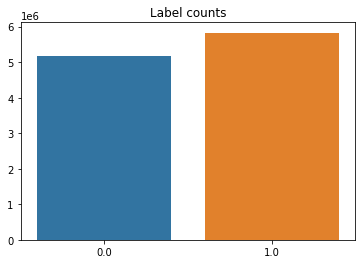

In [75]:
sns.barplot(x = data2['class_label'].value_counts().index, y = data2['class_label'].value_counts().values)
plt.title('Label counts')
plt.show()

In [76]:
y=data2.class_label
y

0           1.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
10999995    0.0
10999996    1.0
10999997    1.0
10999998    1.0
10999999    0.0
Name: class_label, Length: 11000000, dtype: float32

In [77]:
data2.drop(['class_label'],inplace=True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
data2.head()

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,jet_2_pt,jet_2_eta,jet_2_phi,jet_2_b-tag,jet_3_pt,jet_3_eta,jet_3_phi,jet_3_b-tag,jet_4_pt,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,3.937258,-0.357501,0.217922,0.318690,0.674522,2.171000,1.707131,-1.574925,0.000000,1.768692,-1.488084,-0.821354,2.214872,1.235145,-0.176415,1.211447,2.548224,1.780036,0.204414,0.336670,0.000000,0.925134,1.044219,0.997165,2.035658,1.892444,1.729419,1.589167
1,1.012589,0.857038,0.342766,0.531022,-0.300299,0.779394,1.168446,-0.876966,0.000000,1.006347,-0.322436,1.167261,2.214872,0.864408,0.616411,1.513778,2.548224,1.232127,1.884218,-0.713329,0.000000,0.877970,1.034208,0.986979,1.280738,0.604004,1.139072,1.007431
2,0.777972,0.777173,-0.468544,0.527515,-1.586283,1.395361,1.047638,-0.967329,2.173076,1.788333,1.281302,0.962529,0.000000,0.740244,0.854896,0.475868,0.000000,0.513833,-0.470173,-0.918646,0.000000,0.856452,1.114653,0.988671,0.546121,0.647029,0.661975,0.624486
3,0.523589,0.351549,1.295463,3.095207,-1.571370,2.083423,-0.300065,-0.071457,0.000000,1.090576,-0.568193,1.698233,2.214872,2.105349,-0.262889,0.419840,2.548224,0.549370,-1.880143,-0.916427,0.000000,2.178429,1.576881,0.988934,0.687118,1.490392,1.353209,1.449221
4,1.347130,-0.773385,0.635733,0.923515,0.520972,1.348275,1.789320,1.459277,0.000000,0.773299,1.304615,-1.277979,0.000000,1.107293,0.737474,-0.494467,2.548224,0.925677,-0.728348,-0.770485,3.101961,1.444574,1.466996,0.991051,0.848341,0.756146,1.285646,1.377754


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2,y, test_size=0.30, random_state=123)

In [80]:
y_train.shape

(7700000,)

In [81]:
x_train.shape

(7700000, 28)

In [82]:
# import tensorflow as tf
from tensorflow.keras import layers 
# from tensorflow.keras.regularizers import l2
from tensorflow.keras import initializers
# from sklearn import datasets
# import sklearn

To run NN on 1 million rows we have tried from 3-5 Dense layers and we find out best performance to get accuracy can be achieved by having 'Four' layers and by manipulating number of nodes from 100-300 we learned sequesnce of 200-100-100-1 nodes in the layers performed the best score. We triedn gelu, sigmoid, tanh, relu but best srquences of models was achived 'tanh- tanh-tanh-sigmoid'.

For whole dataset we ended up using 1000-1000-500-500-100-1 nodes for 6 layers and having drop outs of 0.5 for model tuning purpose. we used 'tanh' for first five layers and signmoid for the last one.

In [89]:
seed = 42
first_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.1, seed=seed
)
hidden_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.05, seed=seed
)
output_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.001, seed=seed
)
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28,)))
model.add(layers.Dense(1000,activation='tanh'))  
keras.layers.Dropout(0.5),
model.add(layers.Dense(1000,activation='tanh'))  
keras.layers.Dropout(0.5),
model.add(layers.Dense(500,activation='tanh')),
keras.layers.Dropout(0.5),
model.add(layers.Dense(500,activation='tanh')),
keras.layers.Dropout(0.5),
model.add(layers.Dense(100,activation='tanh')),
keras.layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid')) 

In [90]:
auc_score = tf.keras.metrics.AUC()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy','mean_absolute_error','accuracy',auc_score])

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [92]:
callbacks = [EarlyStopping( patience=1)]
                            

In [94]:
 
model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test), batch_size=50,callbacks=callbacks)

Epoch 1/10
154000/154000 [==============================] - 1094s 7ms/step - loss: 0.5991 - binary_crossentropy: 0.5991 - mean_absolute_error: 0.4114 - accuracy: 0.6727 - auc_4: 0.7375 - val_loss: 0.5771 - val_binary_crossentropy: 0.5771 - val_mean_absolute_error: 0.3886 - val_accuracy: 0.6973 - val_auc_4: 0.7664
Epoch 2/10
154000/154000 [==============================] - 1093s 7ms/step - loss: 0.5737 - binary_crossentropy: 0.5737 - mean_absolute_error: 0.3896 - accuracy: 0.6977 - auc_4: 0.7673 - val_loss: 0.5693 - val_binary_crossentropy: 0.5693 - val_mean_absolute_error: 0.3882 - val_accuracy: 0.7014 - val_auc_4: 0.7730
Epoch 3/10
154000/154000 [==============================] - 1091s 7ms/step - loss: 0.5713 - binary_crossentropy: 0.5713 - mean_absolute_error: 0.3876 - accuracy: 0.7004 - auc_4: 0.7700 - val_loss: 0.5716 - val_binary_crossentropy: 0.5716 - val_mean_absolute_error: 0.3818 - val_accuracy: 0.7033 - val_auc_4: 0.7731


In [95]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1000)              29000     
_________________________________________________________________
dense_19 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_20 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_21 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 101       
Total params: 1,831,201
Trainable params: 1,831,201
Non-trainable params: 0
____________________________________________

In [96]:
model.history.history

{'accuracy': [0.6727168560028076, 0.6976591944694519, 0.7004002332687378],
 'auc_4': [0.7374814748764038, 0.7672718167304993, 0.7699735164642334],
 'binary_crossentropy': [0.5990597009658813,
  0.5737413167953491,
  0.5712922215461731],
 'loss': [0.5990597009658813, 0.5737413167953491, 0.5712922811508179],
 'mean_absolute_error': [0.4113905429840088,
  0.3896031081676483,
  0.38757818937301636],
 'val_accuracy': [0.6972597241401672, 0.7013903260231018, 0.7033296823501587],
 'val_auc_4': [0.7663644552230835, 0.7729586958885193, 0.7731026411056519],
 'val_binary_crossentropy': [0.5771429538726807,
  0.5693021416664124,
  0.5715816020965576],
 'val_loss': [0.5771429538726807, 0.5693021416664124, 0.5715816020965576],
 'val_mean_absolute_error': [0.3886156678199768,
  0.38823139667510986,
  0.3818157911300659]}

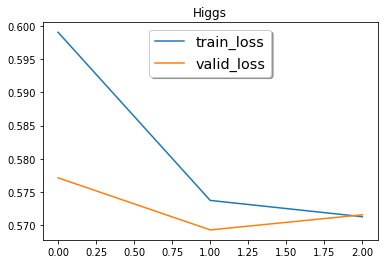

In [97]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss,label='train_loss')
plt.plot(val_loss,label='valid_loss')
plt.title("Higgs")
legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show();